In [10]:
%matplotlib widget
import importlib
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
sys.path.append("..")       # to make the upper folder visible
import src
_ = importlib.reload(src)   # this make changes in the src package immediately effective without restarting the kernel

# folder path
dirPath = "../data/raw/1st_test_IMSBearing/"
indx=0
fileList=[]
for fileName in os.listdir(dirPath):
    # check if current path is a file
    if os.path.isfile(os.path.join(dirPath, fileName)):# and indx<6:
        fileList.append(fileName)
        snap=src.data.snapshot()
        snap.readImsFile(path=dirPath+fileName, variables="Bearing 3 x")
        # ax=snap.rawData.plot(x='time',y='Bearing 1 x',legend=False)
        # ax.grid(which='major',axis='both',color='grey', linestyle='-')
        # ax.grid(which='minor',axis='both',color='grey', linestyle=':')
        # ax.minorticks_on()
        # plt.figure(clear=True)

        # Frequency domain analisys
        samplFreq=20000 #hz
        y=snap.rawData["Bearing 3 x"].to_numpy()
        tpCount     = len(y)
        fourierTransform = np.fft.fft(y)/len(y)           # Normalize amplitude
        FFT=abs(fourierTransform[range(int(len(y)/2))])
        if indx==0:
            freqAnaly=FFT
        else:
            freqAnaly = np.vstack([freqAnaly, FFT])       # Exclude sampling frequency
        values      = np.arange(int(tpCount/2))
        timePeriod  = tpCount/samplFreq
        FFTfrequencies = values/timePeriod
        indx+=1



(2156, 10240)
(2156, 10240)
(2156, 10240)
[0, 431, 862, 1293, 1724, 2155]


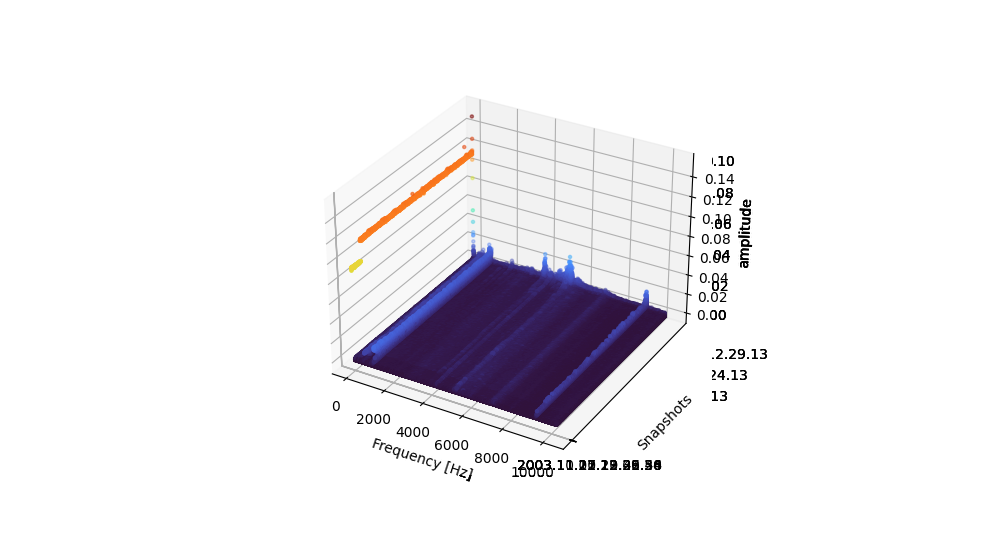

In [11]:
from mpl_toolkits import mplot3d
x = np.arange(0,freqAnaly.shape[1],1)
y = np.arange(0,freqAnaly.shape[0],1)
X,Y = np.meshgrid(x,y)
# Plot a 3D surface
print(X.shape)
print(Y.shape)
print(freqAnaly.shape)
fig = plt.figure('figure1')#,figsize=[15, 15])
ax = plt.axes(projection='3d')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Snapshots')
ax.set_zlabel('amplitude')
ax.yaxis.set_ticks(np.arange(0,6,1))
dummy=np.round(np.linspace(0, len(fileList) - 1, 6)).astype(int).tolist()
print(dummy)
ax.set_yticklabels([fileList[i] for i in dummy])
# Create surface plot
ax.scatter(X, Y, freqAnaly, marker='.',c=freqAnaly/np.max(freqAnaly), cmap='turbo')

plt.show()